In [1]:
from set_paths import create_path_dict
path_dict = create_path_dict(define_user = True, user = "b")

In [2]:
# import and clean SOEP IS data
from beliefs.process_soep_is import load_and_filter_soep_is
from beliefs.process_soep_is import add_covariates
df = load_and_filter_soep_is(path_dict)
df = add_covariates(df, path_dict)

c:\Users\bruno\miniconda3\envs\policy_uncertainty\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\users\bruno\papers\policy_uncertainty\analysis\src\beliefs\process_soep_is.py:26: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(soep_is_path)[id_columns + pension_survey_columns].astype(float)


795 observations in SOEP-IS pension beliefs survey.
Extracting covariates from SOEP data. This may take a while.
795 left after dropping missing and unspecified sex.


c:\users\bruno\papers\policy_uncertainty\analysis\src\process_data\soep_vars\birth.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month[invalid_month] = 6


In [3]:
#df["sex"].value_counts(dropna = False)
#df["age"].value_counts(dropna = False)
#df["education"].value_counts(dropna = False)
#df["health"].value_counts(dropna = False)


** SRA Beliefs ** 

In [3]:
from specs.derive_specs import read_and_derive_specs
specs = read_and_derive_specs(path_dict["specs"])
from beliefs.sra_beliefs.est_SRA_expectations import estimate_truncated_normal
df_truncated_normal = estimate_truncated_normal(df, paths=path_dict, options=specs)



661 observations in SOEP-IS policy uncertainty survey after filtering people with missing policy uncertainty # questions and people born before 1947 or after 2000.


In [4]:
df_truncated_normal

,,hid,cid,intid,exp_stop_work,exp_stop_work_rob_plus1,exp_stop_work_rob_minus1,exp_pens_uptake,exp_pens_uptake_rob_plus1,exp_pens_uptake_rob_minus1,pol_unc_stat_ret_age_67,...,education,health,time_to_ret,mu,sigma,ex_val,var,error_1,error_2,current_SRA
pid,syear,,,,,,,,,,,,,,,,,,,,,
9015602.0,2022.0,901563.0,952141.0,-2.0,65.0,60.0,30.0,67.0,20.0,30.0,20.0,...,1.0,0.0,40.0,68.000000,2.000000,68.658511,1.787387,1.068982e-03,9.260223e-02,67.0
9016402.0,2022.0,901644.0,955132.0,-2.0,70.0,0.0,0.0,70.0,0.0,0.0,0.0,...,1.0,1.0,38.0,2295.200745,38.564370,71.332911,0.438663,6.000149e-09,2.312519e-09,67.0
9021302.0,2022.0,902136.0,921815.0,365.0,67.0,50.0,50.0,67.0,50.0,50.0,100.0,...,0.0,0.0,37.0,65.890932,0.492605,66.737024,0.042116,1.222295e-09,9.989086e-07,67.0
9029702.0,2022.0,902977.0,973475.0,-2.0,70.0,10.0,20.0,70.0,20.0,30.0,50.0,...,1.0,0.0,44.0,65.609289,1.901893,67.729788,0.963264,4.597719e-21,4.530314e-21,67.0
9032402.0,2022.0,903248.0,965480.0,17260.0,65.0,20.0,20.0,67.0,50.0,20.0,70.0,...,0.0,1.0,25.0,-76.993213,11.078710,67.337928,0.665563,3.985539e-05,5.769843e-05,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41833601.0,2022.0,4183369.0,4183369.0,-2.0,67.0,90.0,10.0,67.0,50.0,50.0,60.0,...,0.0,0.0,13.0,66.275561,1.296730,67.457134,0.550199,1.300464e-20,9.196823e-21,67.0
41833801.0,2022.0,4183385.0,4183385.0,1368.0,65.0,100.0,50.0,65.0,70.0,20.0,100.0,...,1.0,0.0,30.0,65.890932,0.492605,66.737024,0.042116,1.222295e-09,9.989086e-07,67.0
41834101.0,2022.0,4183415.0,4183415.0,19008.0,65.0,0.0,100.0,60.0,100.0,0.0,20.0,...,0.0,0.0,5.0,68.338709,1.408327,68.583789,1.355644,4.405167e-24,1.636350e-24,67.0


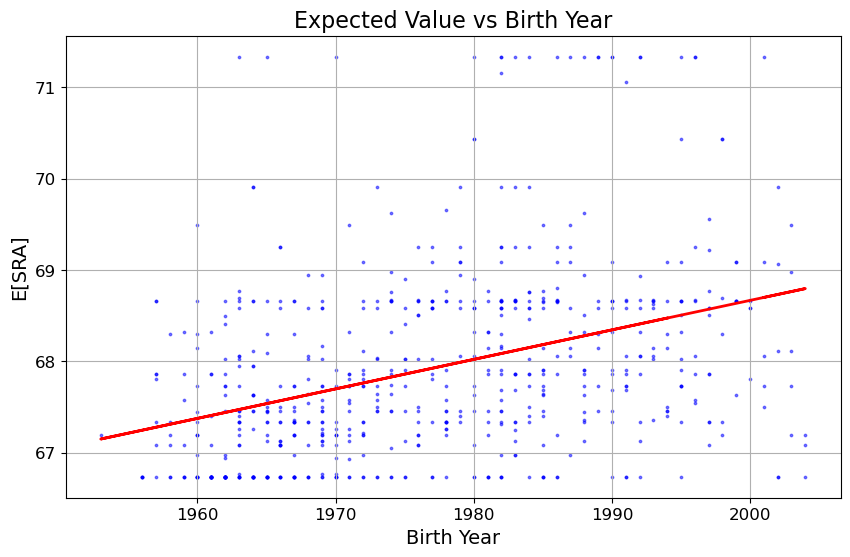

In [8]:
df_truncated_normal

# plot ex_val (y) vs gebjahr (x) with trendline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_truncated_normal["gebjahr"], df_truncated_normal["ex_val"], alpha=0.5, s=3, color='blue')
plt.title("Expected Value vs Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("E[SRA]")
import numpy as np
z = np.polyfit(df_truncated_normal["gebjahr"], df_truncated_normal["ex_val"], 1)
p = np.poly1d(z)
plt.plot(df_truncated_normal["gebjahr"], p(df_truncated_normal["gebjahr"]), color='red', linewidth=2, label='OLS fit')
plt.grid()



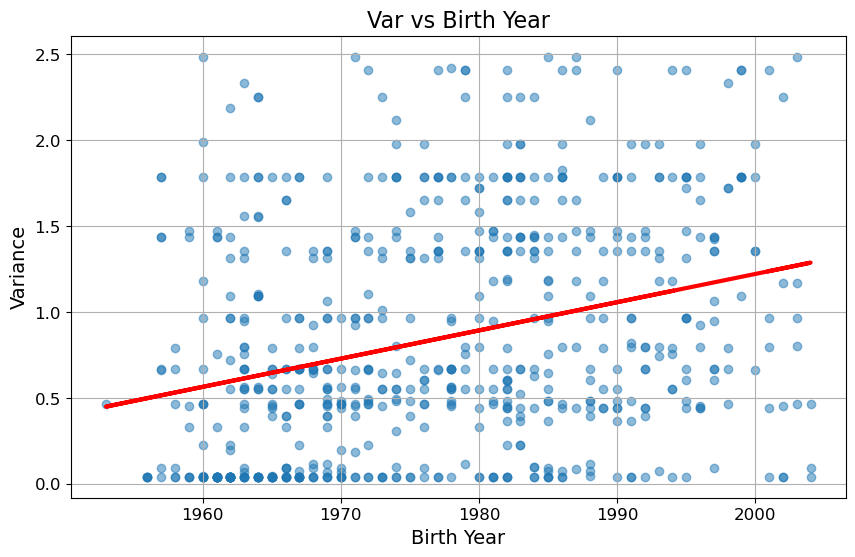

In [9]:
# plot var (y) vs gebjahr (x) with trendline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_truncated_normal["gebjahr"], df_truncated_normal["var"], alpha=0.5)
plt.title("Var vs Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Variance")
import numpy as np
z = np.polyfit(df_truncated_normal["gebjahr"], df_truncated_normal["var"], 1)
p = np.poly1d(z)
plt.plot(df_truncated_normal["gebjahr"], p(df_truncated_normal["gebjahr"]), color='red')
plt.grid()



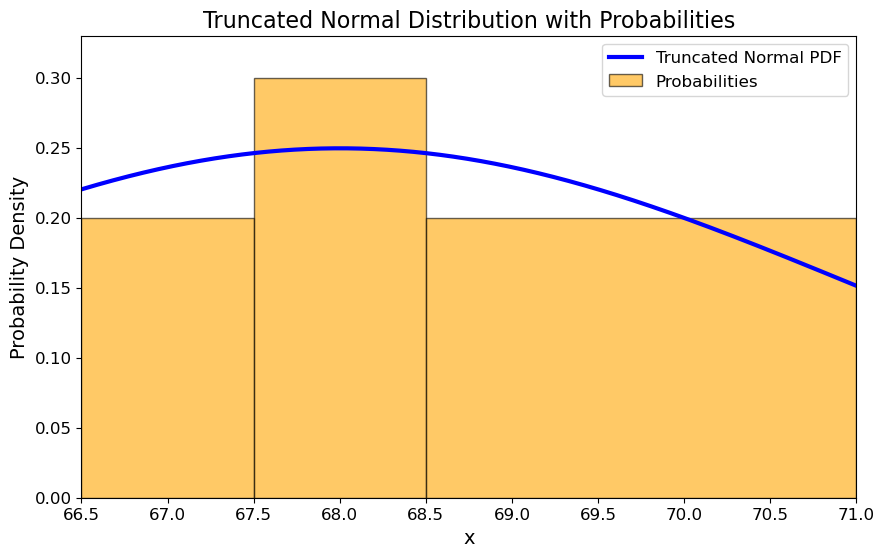

In [18]:
# plot truncated normal distribution with mu = 68 and sigma = 3
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the truncated normal distribution
mu = 68
sigma = 3
lower = 66.5
upper = 71
a, b = (lower - mu) / sigma, (upper - mu) / sigma

# Generate the x values and the PDF
x = np.linspace(lower, upper, 1000)
pdf = truncnorm.pdf(x, a, b, loc=mu, scale=sigma)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label="Truncated Normal PDF")

# Add the bars for the probabilities
prob_67 = 0.2
prob_68 = 0.3
prob_69plus = 0.5
prob_69plus /= (upper - 68.5)  # Normalize the probability for the range 69 and above

# Define the x positions and widths for the bars
bar_positions = [66.5, 67.5, 68.5]
bar_widths = [1.0, 1.0, upper - 68.5]
bar_heights = [prob_67, prob_68, prob_69plus]

# Plot the bars
for pos, width, height in zip(bar_positions, bar_widths, bar_heights):
    plt.bar(pos, height, width=width, align='edge', color='orange', alpha=0.6, edgecolor='black', label="Probabilities" if pos == 66.5 else "")

# Add labels and legend
plt.title("Truncated Normal Distribution with Probabilities")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.xlim(lower, upper)
plt.ylim(0, max(max(pdf) * 1.1 , max(bar_heights) * 1.1))
plt.legend()

# Show the plot
plt.show()



ImportError: cannot import name 'estimate_truncated_normal_parameters' from 'beliefs.sra_beliefs.est_SRA_random_walk' (c:\users\bruno\papers\policy_uncertainty\analysis\src\beliefs\sra_beliefs\est_SRA_random_walk.py)